In [3]:
class Node:
    def __init__(self,data,left=None,right=None):
        self.left = left
        self.right = right
        self.data = data
    
    @property
    def is_leaf(self):
        return self.left is None and self.right is None
    
    def __str__(self):
        return "NODE: "+str(self.data)
    
    def __repr__(self):
        return str(self)

class BST(Node):
    def __init__(self, data, left=None, right=None):
        super().__init__(data, left, right)

    def insert(self,bst_node,height=0):
        if not isinstance(bst_node,BST):
            bst_node = BST(bst_node)
        if bst_node.data > self.data:
            if self.right is None:
                self.right = bst_node
                return height+1
            return self.right.insert(bst_node,height=height+1)
        if bst_node.data < self.data:
            if self.left is None:
                self.left = bst_node
                return height+1
            return self.left.insert(bst_node,height=height+1)

    def search(self,key):
        if self.data == key: return True
        if key > self.data:
            if self.right is None:
                return False
            return self.right.search(key)
        if key < self.data:
            if self.left is None:
                return False
            return self.left.search(key)

In [4]:
from os import system
from sys import platform

def toTikz(tree):
    return (r"\documentclass[convert]{standalone}" "\n"
            r"\usepackage{tree-dvips}" "\n"
            r"\usepackage{qtree}" "\n"
            r"\begin{document}" "\n"
            r"\Tree"
            f"{_toTikz(tree)}\n"
            r"\end{document}")
def _toTikz(node: Node):
    if node is None:
        return '-'
    if node.is_leaf:
        return str(node.data)
    return f"[.{node.data} {_toTikz(node.left)} {_toTikz(node.right)} ]"

def createPdf(node,filename,verbose = False,image_extension='jpeg',resolution=500):
    if platform!= "linux":
        raise OSError("this function is not supported in this machine :(")
    if image_extension not in ['jpeg','png','tiff','']:
        raise ValueError(f"the image_extension must be 'jpeg','png','tiff' not {image_extension} "
                         f"or empty string if u dont want to image version of output")
    with open(f"{filename}.tex",'w') as f:
        tikz = toTikz(node)
        f.write(tikz)
    system("ls qtree.sty || wget https://www.ling.upenn.edu/advice/latex/qtree/qtree.sty")
    system("ls tree-dvips.sty || wget http://ctan.math.washington.edu/tex-archive/macros/latex209/contrib/trees/tree-dvips/tree-dvips.sty")
    system(f"pdflatex {filename}.tex")
    if verbose:
        print(f"output is in {filename}.pdf\n")
        print(tikz)
    system(f"xdg-open {filename}.pdf")
    if not image_extension=='':
        system(f"pdftoppm -singlefile -{image_extension} -r {resolution}  {filename}.pdf {filename}")
    t = ["aux", "bbl", "blg", "idx", "ind", "lof",
         "lot", "out", "toc", "acn", "acr", "alg",
         "glg", "glo", "gls", "ist", "fls", "log",
         "fdb_latexmk"]
    for i in t:
        try:
            system(f"rm *.{i}")
        except OSError as e:
            print(e,i)
t = BST(8)
for i in [3,10,1,6,14,4,7,13]:
    print(f"Node {i} goes in height {t.insert(BST(i))}")
print("\n"*4)
createPdf(t,'testFile')

Node 3 goes in height 1
Node 10 goes in height 1
Node 1 goes in height 2
Node 6 goes in height 2
Node 14 goes in height 2
Node 4 goes in height 3
Node 7 goes in height 3
Node 13 goes in height 3







# Sorting an array using BST
simply write the in-order form of the tree

In [5]:
def inOrder(root):
    stack=[]
    while 1:
        if root is not None :
            stack.append(root)
            root=root.left
        else:
            if len(stack)==0:
                break
            else:
                root=stack.pop()
                yield  root.data
                root=root.right
list(inOrder(t))

[1, 3, 4, 6, 7, 8, 10, 13, 14]

# BST trees
is the structure of tree important for number of entered values?

In [ ]:
def create_BST(lst,show=True,filename='testFile'):
    t = BST(lst[0])
    for i in lst[1:]:
        t.insert(i)
    if show:
        createPdf(t,filename)
    return t

In [ ]:
t1 = create_BST([1,2,3,4,5,6,7],filename='tree1')

<img src="tree1.jpg">

In [ ]:
create_BST([7,6,5,4,3,2,1],filename='tree2')

<img src="tree2.jpg">

- Why these trees are not good?
- What is a good tree?

In [ ]:
create_BST([4,2,1,3,6,5,7],filename='tree3')

<img src="tree3.jpg">

# Balance Factor
what is the search price in BST?
$$
BalanceFactor = |height(left\_subtree) − height(right\_subtree)|
$$

# AVL Tree
is a BST in which we have:
$$
BalanceFactor(i) \leq 1 \fore i \in tree
$$
to balance a tree we can rotate a tree using one of these methods:
- Left rotation
- Right rotation
- Left-Right rotation
- Right-Left rotation

## Left Rotation
<img src='rotation_imgs/avl_left_rotation.jpg'>

## Right Rotation
<img src='rotation_imgs/avl_right_rotation.jpg'>

# Left-Right Rotation
<img src="rotation_imgs/right_subtree_of_left_subtree.jpg">
<img src="rotation_imgs/subtree_left_rotation.jpg">
<img src="rotation_imgs/left_unbalanced_tree.jpg">

# Right-Left Rotation
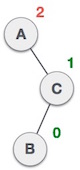
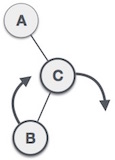
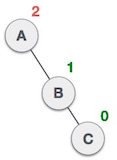